Movie Rating Prediction

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset

# Specify the file path
file_path = 'movies.dat'  

# Read the .dat file using pandas
movie_data = pd.read_csv(file_path, sep='::',encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(movie_data.head())

   1                    Toy Story (1995)   Animation|Children's|Comedy
0  2                      Jumanji (1995)  Adventure|Children's|Fantasy
1  3             Grumpier Old Men (1995)                Comedy|Romance
2  4            Waiting to Exhale (1995)                  Comedy|Drama
3  5  Father of the Bride Part II (1995)                        Comedy
4  6                         Heat (1995)         Action|Crime|Thriller


C:\Users\Catalyst\AppData\Local\Temp\ipykernel_3736\1820037853.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_data = pd.read_csv(file_path, sep='::',encoding='ISO-8859-1')


In [3]:
# Specify the file path
file_path = 'ratings.dat'  

# Read the .dat file using pandas
rating_data = pd.read_csv(file_path, sep='::',encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(rating_data.head())

C:\Users\Catalyst\AppData\Local\Temp\ipykernel_3736\1024560818.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_data = pd.read_csv(file_path, sep='::',encoding='ISO-8859-1')


   1  1193  5  978300760
0  1   661  3  978302109
1  1   914  3  978301968
2  1  3408  4  978300275
3  1  2355  5  978824291
4  1  1197  3  978302268


In [4]:
# Specify the file path
file_path = 'users.dat'  

# Read the .dat file using pandas
user_data = pd.read_csv(file_path, sep='::',encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(user_data.head())

   1  F  1.1  10  48067
0  2  M   56  16  70072
1  3  M   25  15  55117
2  4  M   45   7  02460
3  5  M   25  20  55455
4  6  F   50   9  55117


C:\Users\Catalyst\AppData\Local\Temp\ipykernel_3736\3156993925.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  user_data = pd.read_csv(file_path, sep='::',encoding='ISO-8859-1')


Data Analysis and Cleaning part

In [5]:
#first for movie data
movie_data.info()   #check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   1                            3882 non-null   int64 
 1   Toy Story (1995)             3882 non-null   object
 2   Animation|Children's|Comedy  3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
movie_data.isnull().sum()   # Check for null values

1                              0
Toy Story (1995)               0
Animation|Children's|Comedy    0
dtype: int64

In [7]:
movie_data.describe()   # 5-number summary

,1
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [8]:
rating_data.info()  # now for the rating data          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   1          1000208 non-null  int64
 1   1193       1000208 non-null  int64
 2   5          1000208 non-null  int64
 3   978300760  1000208 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [9]:
rating_data.isnull().sum()  # check if there is any null value

1            0
1193         0
5            0
978300760    0
dtype: int64

In [10]:
rating_data.describe()                        


,1,1193,5,978300760
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [11]:
user_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       6039 non-null   int64 
 1   F       6039 non-null   object
 2   1.1     6039 non-null   int64 
 3   10      6039 non-null   int64 
 4   48067   6039 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [12]:
user_data.isnull().sum()        # Check for null values

1        0
F        0
1.1      0
10       0
48067    0
dtype: int64

In [13]:
user_data.describe()    

,1,1.1,10
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


From above we can see that there are no null values but the column headings are missing so we wil assign the heading name by ourslef

In [14]:
#ASSIGNING HEADINGS TO THE COLUMNS
movie_data.columns = ['Movie_id', 'movie_title', 'Genre']  
rating_data.columns = ['User_id', 'movie_id', 'rating','timestamp']                      
user_data.columns=['user_id','gender','age','occupation','zipcode']

In [15]:
#check the data again
movie_data.head()

,Movie_id,movie_title,Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [16]:
rating_data.head()  

,User_id,movie_id,rating,timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [17]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [18]:
#merging the datsets

combine_data=pd.concat([movie_data,rating_data,user_data],axis=1)   #merging the datasets
combine_data.dropna(inplace=True)   #dropping the null values
combine_data.head()     
#this is our combined dataset


,Movie_id,movie_title,Genre,User_id,movie_id,rating,timestamp,user_id,gender,age,occupation,zipcode
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [19]:
combine_data.isnull().sum() # check for null values

Movie_id       0
movie_title    0
Genre          0
User_id        0
movie_id       0
rating         0
timestamp      0
user_id        0
gender         0
age            0
occupation     0
zipcode        0
dtype: int64

In [20]:
#now we will remove the uneccessary columns from the dataset

columnstoremove=['occupation','zipcode','timestamp']    #these are the columns which are not required

combine_data=combine_data.drop(columnstoremove,axis=1)  #dropping the columns

In [21]:
combine_data.head() 

,Movie_id,movie_title,Genre,User_id,movie_id,rating,user_id,gender,age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,M,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,M,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,M,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,M,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,F,50.0


In [22]:
#converting age to numkerical column
#we will encode the age col like 0 for female and 1 will be for male
combine_data['gender']=combine_data['gender'].replace({'M':1,'F':0})        

In [23]:
combine_data.head() # 5 rows

,Movie_id,movie_title,Genre,User_id,movie_id,rating,user_id,gender,age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0,50.0


In [24]:
combine_data.shape  

(3882, 9)

Visulization part

<Axes: xlabel='gender', ylabel='count'>

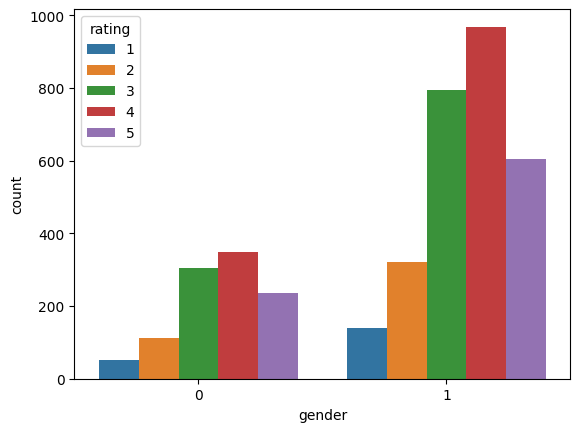

In [25]:
#visulizing the rating column with respect to gender
sns.countplot(x=combine_data['gender'],hue=combine_data['rating'])  #hue is used to differentiate the rating column

Text(0.5, 0, 'RATING')

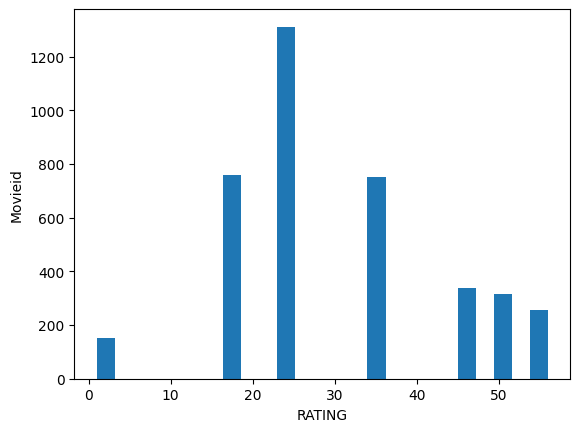

In [26]:
#now visulizing using histogram WITHRESPECT TO AGE
combine_data.age.plot.hist(bins=25) #bins is the number of bars in the histogram
plt.ylabel('Movieid')   #y axis
plt.xlabel('RATING')    #x axis


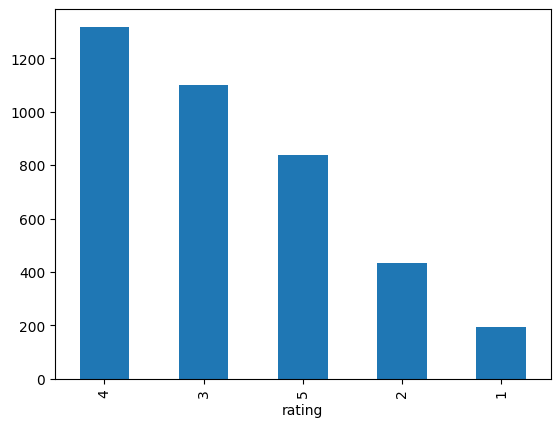

In [27]:
#seeing the rating value count
combine_data['rating'].value_counts().plot(kind='bar')      #plotting the rating value count
plt.show()                                                #showing the plot

<Axes: ylabel='Frequency'>

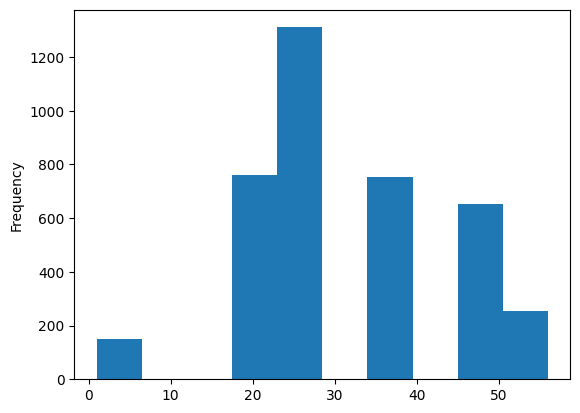

In [28]:
combine_data['age'].plot.hist(bins=10)  # 10 bins

<Axes: xlabel='age', ylabel='count'>

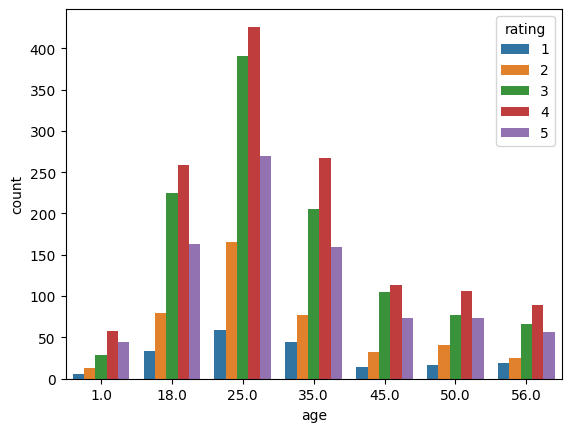

In [29]:
sns.countplot(x=combine_data['age'],hue=combine_data['rating']) 

Final dataset


In [30]:
combine_data.head() 

,Movie_id,movie_title,Genre,User_id,movie_id,rating,user_id,gender,age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0,50.0


In [31]:
#now based on the data visulization we will drop some more columns
coldrop=['rating','movie_title','Genre','Movie_id'] #dropping the columns
inputdataset=combine_data.drop(coldrop,axis=1)  #dropping the columns
inputdataset.head()



,User_id,movie_id,user_id,gender,age
0,1,661,2.0,1,56.0
1,1,914,3.0,1,25.0
2,1,3408,4.0,1,45.0
3,1,2355,5.0,1,25.0
4,1,1197,6.0,0,50.0


In [32]:
target=combine_data['rating']       # target
target.head()

0    3
1    3
2    4
3    5
4    3
Name: rating, dtype: int64

Model training using logistic regression

In [33]:
from sklearn.preprocessing import MinMaxScaler  # for normalization

scaler=MinMaxScaler()   # create an object
scalar_data=scaler.fit_transform(inputdataset)  # fit the data
scaled_df=pd.DataFrame(scalar_data,columns=inputdataset.columns)    # transform the data
scaled_df.head()    # show the data

,User_id,movie_id,user_id,gender,age
0,0.0,0.167046,0.000000,1.0,1.000000
1,0.0,0.231081,0.000258,1.0,0.436364
2,0.0,0.862313,0.000515,1.0,0.800000
3,0.0,0.595799,0.000773,1.0,0.436364
4,0.0,0.302708,0.001031,0.0,0.890909


In [34]:
from sklearn.model_selection import train_test_split    # Import train_test_split function
X_train,X_test,Y_train,Y_test=train_test_split(inputdataset,target,test_size=0.8,random_state=42)              
 # Split dataset into training set and test set

In [35]:
Y_train 

3775    5
2523    3
1683    4
3322    5
3299    5
       ..
1130    3
1294    5
860     4
3507    1
3174    4
Name: rating, Length: 776, dtype: int64

In [36]:
Y_test

3432    3
1018    4
1941    5
3614    5
1200    1
       ..
3072    4
1958    2
1384    3
894     4
828     4
Name: rating, Length: 3106, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression     # Logistic Regression
model=LogisticRegression()                            # Create a Logistic Regression Object
model.fit(X_train,Y_train)                          # Train the model

C:\Users\Catalyst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
X_test=np.array(X_test) # convert to numpy array

In [39]:
model.predict(X_test)   # X_test is a numpy array   

C:\Users\Catalyst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3, 4, 3, ..., 4, 4, 4], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score  # accuracy





In [41]:
X_train_prediction=model.predict(X_train)   #predicting the X_train data


In [42]:
print(X_train_prediction)   


[3 3 4 4 3 4 4 4 4 3 3 3 3 4 4 4 3 4 4 3 4 4 3 4 3 3 4 3 4 3 3 3 4 4 2 4 3
 3 4 3 4 4 4 4 4 3 3 4 4 4 4 4 3 4 4 3 3 3 4 4 3 4 4 3 4 3 3 3 4 3 4 4 3 4
 4 3 3 3 4 3 3 4 3 3 3 3 4 4 3 4 4 4 4 4 4 3 3 4 3 4 3 4 4 3 3 2 3 4 4 4 3
 4 4 3 3 4 4 3 4 3 4 3 4 4 3 3 4 3 3 4 4 4 3 4 4 3 4 3 4 3 3 3 3 3 4 3 3 3
 4 3 4 4 4 4 4 3 3 4 4 4 4 4 4 3 3 4 4 4 4 4 3 4 3 4 4 3 3 4 4 4 4 3 4 4 4
 3 4 4 4 3 4 3 4 4 4 3 4 3 4 3 3 3 3 4 3 4 4 4 4 3 4 4 4 3 4 4 3 4 4 3 4 3
 3 4 3 3 4 4 4 4 4 4 4 4 3 4 3 4 3 3 4 4 4 3 3 4 2 4 4 4 3 3 3 4 4 3 4 4 4
 4 4 4 4 4 4 2 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 3 3 4 3 4 3 4 4
 4 4 3 3 3 3 3 3 4 4 4 4 4 3 3 4 4 3 3 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 3 3
 4 4 4 4 3 3 4 3 3 4 3 4 4 3 4 3 4 3 3 4 4 3 3 3 3 4 3 4 4 3 4 3 3 4 4 3 3
 4 4 3 3 3 3 4 4 3 3 3 4 3 3 3 4 3 4 4 4 3 3 3 4 3 4 3 4 3 4 4 3 3 3 4 4 3
 3 4 4 4 3 4 3 4 3 4 3 4 4 4 4 3 3 3 3 3 4 3 3 4 4 4 4 4 4 4 3 4 3 4 3 4 3
 3 4 4 4 4 4 4 4 3 3 4 4 3 3 4 4 3 3 4 4 3 4 4 3 3 4 4 4 4 4 3 4 4 3 4 3 4
 3 4 3 4 4 4 4 4 3 4 4 4 

In [43]:
#now comparing with the original values

training_accuracy=accuracy_score(Y_train,X_train_prediction)    #comparing the predicted values with the original values
print("Accuracy score of the training  data : ",training_accuracy)  #printing the accuracy score of the training data

Accuracy score of the training  data :  0.3286082474226804


In [44]:
# now evaluate using test data

X_test_prediction=model.predict(X_test) # predict on test data
print(X_test_prediction)             # print prediction values

[3 4 3 ... 4 4 4]


C:\Users\Catalyst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
testing_accuracy=accuracy_score(Y_test,X_test_prediction)   # accuracy of the test data
print("Accuracy score of the test  data : ",testing_accuracy)   # printing the accuracy of the test data

Accuracy score of the test  data :  0.33515775917578877
